In [ ]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import numpy as np

##Linear Regression with scikit-learn

In this exercise we'll learn how linear regression works using a diabetes dataset. We'll first see how we can use scikit-learn's LinearRegression model, then implement our own.

First we need to load our data. Luckily, scikit-learn has a few datasets built in. This dataset has 10 feature columns and one target column. [Here](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) is a description of what each of them are.

In [ ]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print('Type of the training input:', type(diabetes_X))
print('Dimensions of the input data:', diabetes_X.shape)
print('Dimensions of the output data:', diabetes_y.shape)

Type of the training input: <class 'numpy.ndarray'>
Dimensions of the input data: (442, 10)
Dimensions of the output data: (442,)


We only care about a single column at a time, so let's use the BMI and blood pressure columns. For each of them, let's slice them into a train and test set.

In [ ]:
bmi_X_train = diabetes_X[:-20, np.newaxis, 2]
bp_X_train = diabetes_X[:-20, np.newaxis, 3]

bmi_X_test = diabetes_X[-20:, np.newaxis, 2]
bp_X_test = diabetes_X[-20:, np.newaxis, 3]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

print('blood pressure training data input size:', bp_X_train.shape)
print('blood pressure training data output size:', diabetes_y_train.shape)
print('blood pressure test data input size:', bp_X_test.shape)
print('blood pressure test data output size:', diabetes_y_test.shape)

blood pressure training data input size: (422, 1)
blood pressure training data output size: (422,)
blood pressure test data input size: (20, 1)
blood pressure test data output size: (20,)


Here we define some functions to make evaluation of our linear regression easier.

In [ ]:
'''
Prints slope, intercept, MSE< and coefficient of determination 
'''
def regr_info(regr):
    # The coefficient
    print('Coefficient: \n', regr.coef_)
    # The intercept
    print('Intercept: \n', regr.intercept_)
    # The mean squared error
    print(f'Mean squared error: {mean_squared_error(diabetes_y_test, diabetes_y_pred):.2f}')
    # The coefficient of determination: 1 is perfect prediction
    print(f'Coefficient of determination: {r2_score(diabetes_y_test, diabetes_y_pred):.2f}')

In [ ]:
'''
Given X, y data and a LinearRegression object, returns two points representing
the regression line fitting the given data's scale.
'''
def compute_line_from_regr(X_data, y_data, regr):
    l_bound = np.min(X_data)
    r_bound = np.max(X_data)
    return [l_bound, r_bound], [l_bound * regr.coef_ + regr.intercept_, r_bound * regr.coef_ + regr.intercept_]

Let's use sklearn's least squares LinearRegression to predict diabetes given blood pressure:

In [ ]:
# Create linear regression object
regr_bp = linear_model.LinearRegression()

# Train the model using the training set
regr_bp.fit(bp_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr_bp.predict(bp_X_test)

Using our regr_info function defined above, we can see our line coefficient and intercept, the mean squared error of our regression, and the coefficient of determination. The coefficient of determination is the proportion of the variance in the dependent variable (diabetes) that is predictable from the independent variable (blood pressure), with 1 being a perfect score.

In [ ]:
regr_info(regr_bp)

Coefficient: 
 [709.19471785]
Intercept: 
 153.13724802041313
Mean squared error: 4058.41
Coefficient of determination: 0.16


Now we can plot our regression against our training data as well as our testing data. We can clearly see that the correlation between blood pressure and diabetes isn't particularly strong.

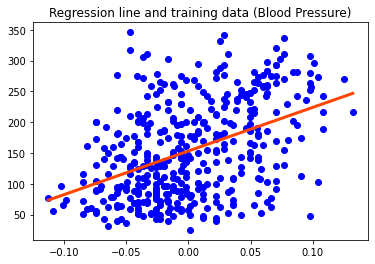

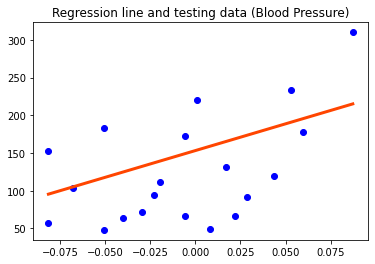

In [ ]:
line_x, line_y = compute_line_from_regr(bp_X_train, diabetes_y_train, regr_bp)

plt.scatter(bp_X_train, diabetes_y_train, color='blue')
plt.plot(line_x, line_y, color='orangered', linewidth=3)
plt.title('Regression line and training data (Blood Pressure)')
plt.show()

line_x, line_y = compute_line_from_regr(bp_X_test, diabetes_y_test, regr_bp)

plt.scatter(bp_X_test, diabetes_y_test, color='blue')
plt.plot(line_x, line_y, color='orangered', linewidth=3)
plt.title('Regression line and testing data (Blood Pressure)')
plt.show()

Now perform linear regression but instead of using blood pressure, use BMI.

In [ ]:
# Create linear regression object
regr_bmi = linear_model.LinearRegression()
# Train the model using the training sets
regr_bmi.fit(bmi_X_train, diabetes_y_train)
# Make predictions using the testing set
diabetes_y_pred = regr_bmi.predict(bmi_X_test)

Call the regr_info() function to get some insight.

In [ ]:
regr_info(regr_bmi)

Coefficient: 
 [938.23786125]
Intercept: 
 152.91886182616167
Mean squared error: 2548.07
Coefficient of determination: 0.47


Recreate the previous plots with your data.

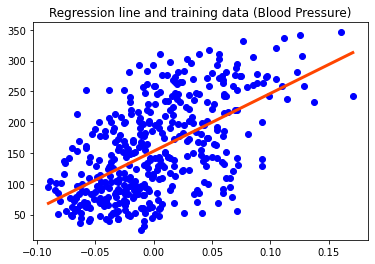

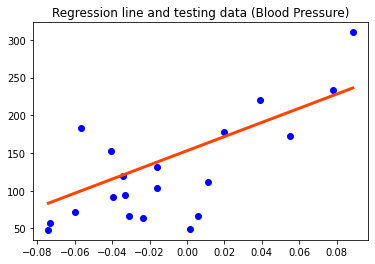

In [ ]:
line_x, line_y = compute_line_from_regr(bmi_X_train, diabetes_y_train, regr_bmi)

plt.scatter(bmi_X_train, diabetes_y_train, color='blue')
plt.plot(line_x, line_y, color='orangered', linewidth=3)
plt.title('Regression line and training data (Blood Pressure)')
plt.show()

line_x, line_y = compute_line_from_regr(bmi_X_test, diabetes_y_test, regr_bmi)

plt.scatter(bmi_X_test, diabetes_y_test, color='blue')
plt.plot(line_x, line_y, color='orangered', linewidth=3)
plt.title('Regression line and testing data (Blood Pressure)')
plt.show()

Does blood pressure or BMI correlate more strongly with diabetes? How did you come to this answer? Refer to the plots and/or the LinearRegression info.

[YOUR ANSWER HERE]

##Linear Regression from scratch

Now how we've seen what linear regression is, let's implement it.

How does it work under the hood? Essentially, we are trying to find $(m, b)$ in the equation of our line $y=mx+b$ to minimize our error. More formally, $$y=\theta_0 + \theta_1 x$$

What exactly is our error? For linear regression, we use Mean Squared Error (MSE) between our predicted y values and our true y values. MSE is defined as:
$$J = \frac{1}{n} \sum_{i=1}^{n}{(pred_i-y_i)^2}$$

In practice, we usually use 
$$J = \frac{1}{2n} \sum_{i=1}^{n}{(pred_i-y_i)^2}$$

to make the derivative simpler.

So what does our algorithm look like? We will use gradient descent to optimize our MSE loss. Since MSE is a convex function, we can optimize it to a minimum value.

With gradient descent, we will iteratively optimize $(\theta_0, \theta_1)$ to minimize our MSE error. Each update, we multiply our computed gradient by the learning rate $\alpha$ to adjust the size of each update step:

$$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1)$$

We can analytically compute the partial derivatives of $J$ with respect to each $\theta_j$ to simplify our process (we will write $J(\theta_0, \theta_1)$ as $J$ for simplicity):

$$\frac{\partial}{\partial \theta_j}J = \frac{\partial}{\partial \theta_j}\frac{1}{2n} \sum_{i=1}^{n}{(pred_i-y_i)^2} =\\ \frac{\partial}{\partial \theta_j}\frac{1}{2n} \sum_{i=1}^{n}{(h_{\theta}(x_i)-y_i)^2} \ \ \text{(Chain Rule)}=\\ \frac{1}{n} \sum_{i=1}^{n}{(h_{\theta}(x_i)-y_i)\frac{\partial}{\partial \theta_1}}(h_{\theta}(x_i) - y) =\\ \frac{1}{n} \sum_{i=1}^{n}{(\theta_0 + \theta_1 x_i-y_i)\frac{\partial}{\partial \theta_j}}(\theta_0 + \theta_1 x_i - y)$$

Now: for $\theta_0$ the partial derivative evaluates to 1, resulting in:

$$\frac{\partial}{\partial \theta_0}J=\frac{1}{n} \sum_{i=1}^{n}{(\theta_0 + \theta_1 x_i-y_i)} \cdot 1$$

And for $\theta_1$ the partial derivative evaluates to $x_i$, resulting in:

$$\frac{\partial}{\partial \theta_1}J=\frac{1}{n} \sum_{i=1}^{n}{(\theta_0 + \theta_1 x_i-y_i)} \cdot x_i$$


*Note that $h_{\theta}(x_i)=pred_i=\theta_0 + \theta_1 x$.

Now that we have $\frac{\partial}{\partial \theta_j}J$ for each $j$, we can fully define our gradient descent update step:

$$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1) = \theta_j - \alpha\frac{1}{n}\sum_{i=1}^{n}(h_{\theta}(x_i)-y)x_i$$

If we specify for each $\theta_j$:

$$ \theta_0 = \theta_0 - \alpha \frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \theta_0 - \alpha\frac{1}{n} \sum_{i=1}^{n}{(\theta_0 + \theta_1 x_i-y_i)} \cdot 1$$

$$\theta_1 = \theta_1 - \alpha \frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1) = \theta_1 - \alpha\frac{1}{n} \sum_{i=1}^{n}{(\theta_0 + \theta_1 x_i-y_i)} \cdot x_i$$

Note that this derivation is specifically for the linear case of only one independent variable. If we add more independent variables, we must refer to a more general derivation which is available in the slides.

Now let's implement it!

In [ ]:
'''
Implementation of MSE as shown in above derivation.
'''
def mse(X, y, h):
    n = len(X)
    return 0.5 * (1/n) * np.sum((y - h)**2)

'''
Implementation of the derivative of MSE as shown in above derivation.
'''
def compute_gradient(X, y, h):
    n = len(X)
    return 1/n * np.dot((h - y), X)

'''
Gradient descent step. 
Takes X, y, current theta_0 & theta_1, and alpha. 
Returns an updated theta_0 & theta_1.
'''
def gradient_descent_step(X, y, theta_0, theta_1, alpha):
    h = 0

    # First compute h (y_pred)
    h = theta_0 + theta_1 * X

    # Then compute theta_0's update step
    theta_0 = theta_0 - alpha * compute_gradient(np.ones_like(X), y, h)

    # Finally compute theta_1's update step
    theta_1 = theta_1 - alpha * compute_gradient(X, y, h)
    
    return theta_0, theta_1

'''
Linear regression algorithm.
'''
def linear_regression(X, y, epochs=100000, alpha=0.02):
    theta_0 = 0
    theta_1 = 0
    n = len(X)
    for epoch in range(epochs):
        theta_0, theta_1 = gradient_descent_step(X, y, theta_0, theta_1, alpha)
        if epoch % (epochs/10) == 0:
            h = theta_0 + theta_1*X
            loss = mse(X, y, h)
            print(f'{100*(epoch+(epochs/10))/epochs}% done. theta_0: {theta_0:.2f}, theta_1: {theta_1:.2f}, Loss: {loss:.2f}')
    return theta_0, theta_1

Let's test our implementation on the blood pressure data so we can validate our results:

In [ ]:
theta_0, theta_1 = linear_regression(bp_X_train.flatten(), diabetes_y_train.flatten())

10.0% done. theta_0: 3.07, theta_1: 0.03, Loss: 14268.57
20.0% done. theta_0: 153.28, theta_1: 258.44, Loss: 2634.72
30.0% done. theta_0: 153.23, theta_1: 422.67, Loss: 2497.57
40.0% done. theta_0: 153.20, theta_1: 527.07, Loss: 2442.15
50.0% done. theta_0: 153.17, theta_1: 593.42, Loss: 2419.76
60.0% done. theta_0: 153.16, theta_1: 635.60, Loss: 2410.71
70.0% done. theta_0: 153.15, theta_1: 662.42, Loss: 2407.05
80.0% done. theta_0: 153.15, theta_1: 679.46, Loss: 2405.58
90.0% done. theta_0: 153.14, theta_1: 690.29, Loss: 2404.98
100.0% done. theta_0: 153.14, theta_1: 697.18, Loss: 2404.74


How well did we do? Here are the results from when we used scikit-learn's LinearRegression (theta_0 = Intercept, theta_1 = Coefficient):

Coefficient: \
 [709.19471785]\
Intercept: \
 153.13724802041313\
Mean squared error: 4058.41\
Coefficient of determination: 0.16

What parameter(s) should we tweak in our algorithm to improve the accuracy of our coefficients?

We see how well our line coefficients match, but let's also compute MSE and coefficient of determination:

(Note, the MSE that scikit-learn provides is not multiplied by 0.5, and we are also evaluating on the testing data. This is the reason for the discrepancy between the MSE loss we were printing above manually and the scikit-learn MSE.)

In [ ]:
diabetes_y_pred = theta_0 + theta_1 * bp_X_test

print(f'Mean squared error: {mean_squared_error(diabetes_y_test, diabetes_y_pred):.2f}')
print(f'Coefficient of determination: {r2_score(diabetes_y_test, diabetes_y_pred):.2f}')

Mean squared error: 4062.88
Coefficient of determination: 0.16


We can also plot our computed line against train and test data and see how it compares to scikit-learn:

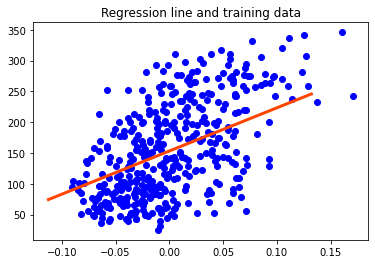

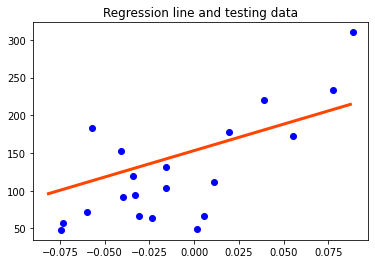

In [ ]:
'''
Given X, y data and the coefficients, returns two points representing
the regression line fitting the given data's scale.
'''
def compute_line_from_coefs(X_data, y_data, theta_0, theta_1):
    l_bound = np.min(X_data)
    r_bound = np.max(X_data)
    return [l_bound, r_bound], [l_bound * theta_1 + theta_0, r_bound * theta_1 + theta_0]

line_x, line_y = compute_line_from_coefs(bp_X_train, diabetes_y_train, theta_0, theta_1)

plt.scatter(bmi_X_train, diabetes_y_train, color='blue')
plt.plot(line_x, line_y, color='orangered', linewidth=3)
plt.title('Regression line and training data')
plt.show()

line_x, line_y = compute_line_from_coefs(bp_X_test, diabetes_y_test, theta_0, theta_1)

plt.scatter(bmi_X_test, diabetes_y_test, color='blue')
plt.plot(line_x, line_y, color='orangered', linewidth=3)
plt.title('Regression line and testing data')
plt.show()